# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Qalby
- **Email:** 2110817210001@mhs.ulm.ac.id
- **ID Dicoding:** qalby6702

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda di berbagai hari dalam seminggu pada tiap musim di tahun 2011?

2. Bagaimana tren penggunaan sepeda berubah setiap bulan sepanjang musim panas tahun 2012?

3. Bagaimana perbedaan rata-rata penyewaan sepeda antara pengguna kasual dan terdaftar pada hari kerja selama tahun 2012?

## Import Semua Packages/Library yang Digunakan

pandas digunakan untuk memanipulasi data, matplotlib dan seaborn digunakan untuk menvisualisasikan data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat data csv menjadi sebuah dataframe

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Untuk menjawab pertanyaan 1, bisa menggunakan rata-rata penyewaan sepeda berdasarkan hari dalam seminggu di tiap musim. Analisa akan melibatkan kolom yr, weekday, season, cnt.
- Untuk menjawab pertanyaan 2, akan melibatkan kolom yr, mnth, dan season.
- Untuk menjawab pertanyaan 3, akan melibatkan kolom workingday, casual, registered, yr

### Assessing Data

Mencari ketidaksesuaian data di tabel day

In [ ]:
day_df.info()
print("Jumlah Duplikasi Data: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah Duplikasi Data:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan tipe data pada kolom dteday, seharusnya datetime bukan object
- tabel day tidak memiliki missing value ataupun data duplikat

### Cleaning Data

Mengonversi kolom 'dteday' menjadi tipe data datetime



In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tipe data kolom 'dteday' sudah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore pertanyaan 1

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menfilter data berdasarkan waktu tahun 2011 saja, kemudian mengelompokkannya berdasarkan musim dan hari

In [ ]:
df_2011 = day_df[day_df['yr'] == 0]

cnt_by_day_season = df_2011.groupby(by=["season", "weekday"])["cnt"].mean().reset_index()
cnt_by_day_season

,season,weekday,cnt
0,1,0,1429.384615
1,1,1,1500.000000
2,1,2,1570.833333
3,1,3,1789.230769
4,1,4,1791.000000
5,1,5,1988.538462
6,1,6,1583.857143
7,2,0,3966.692308
8,2,1,3767.214286
9,2,2,3702.769231


### Eksplore pertanyaan 2

Menfilter data berdasarkan tahun 2012 dan di musim panas

In [ ]:
df_summer_2012 = day_df[(day_df["yr"] == 1) & (day_df["season"] == 2)]

months_summer_2012 = df_summer_2012.groupby("mnth")["cnt"].sum().reset_index()
months_summer_2012

,mnth,cnt
0,3,64016
1,4,174224
2,5,195865
3,6,137168


### Eksplore pertanyaan 3

In [ ]:
df_workingday = day_df[day_df['workingday'] == 1]

avg_rentals = df_workingday.groupby('yr').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

avg_rentals

,yr,casual,registered
0,0,473.416,2951.64
1,1,739.724,5004.86


mengonversi angka di kolom yr menjadi tahun sesungguhnya

In [ ]:
year_mapping = {0: '2011', 1: '2012'}
avg_rentals['yr'] = avg_rentals['yr'].map(year_mapping)

avg_rentals_melted = avg_rentals.melt(id_vars='yr', value_vars=['casual', 'registered'], var_name='User Type', value_name='Average Rentals')
avg_rentals_melted

,yr,User Type,Average Rentals
0,2011,casual,473.416
1,2012,casual,739.724
2,2011,registered,2951.640
3,2012,registered,5004.860


**Insight:**
- cnt_by_day_season berisi data rata-rata penyewaan berdasarkan hari dan musim di tahun 2011
- months_summer_2012 berisi data penywaan berdasarkan bulan di musim panas tahun 2012
- avg_rentals_melted berisi data rata-rata jumlah penyewa kasual dan terdaftar di tahun 2011 dan 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda di berbagai hari dalam seminggu pada tahun 2011?

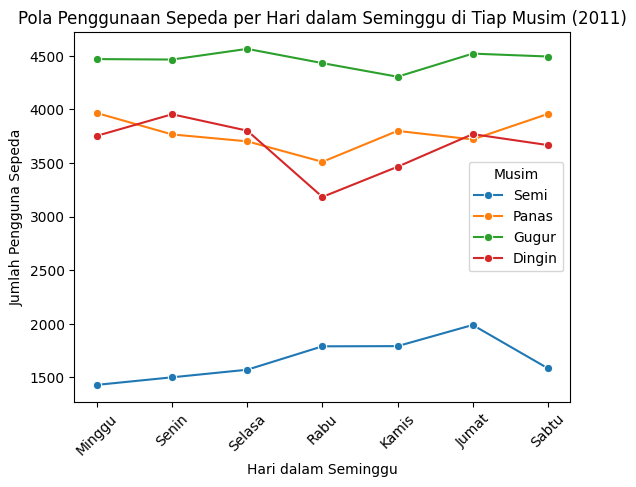

In [ ]:
weekday_mapping = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

season_mapping = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}

cnt_by_day_season['day_name'] = cnt_by_day_season['weekday'].map(weekday_mapping)
cnt_by_day_season['season_name'] = cnt_by_day_season['season'].map(season_mapping)

sns.lineplot(data=cnt_by_day_season, x="day_name", y="cnt", hue="season_name", marker="o")
plt.title("Pola Penggunaan Sepeda per Hari dalam Seminggu di Tiap Musim (2011)")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.xticks(rotation=45)
plt.legend(title="Musim")
plt.show()

### Pertanyaan 2: Bagaimana tren penggunaan sepeda berubah setiap bulan sepanjang musim panas tahun 2012?


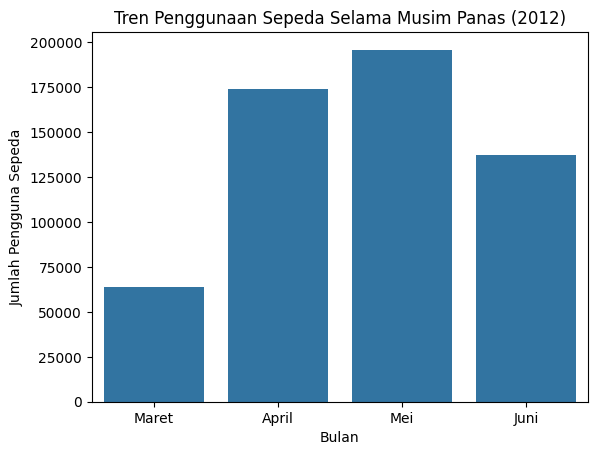

In [ ]:
month_mapping = {
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni'
}
months_summer_2012['month_name'] = months_summer_2012['mnth'].map(month_mapping)

sns.barplot(data=months_summer_2012, x="month_name", y="cnt")
plt.title("Tren Penggunaan Sepeda Selama Musim Panas (2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

### Pertanyaan 3: Bagaimana perbedaan rata-rata penyewaan sepeda antara pengguna kasual dan terdaftar pada hari kerja selama tahun 2012?


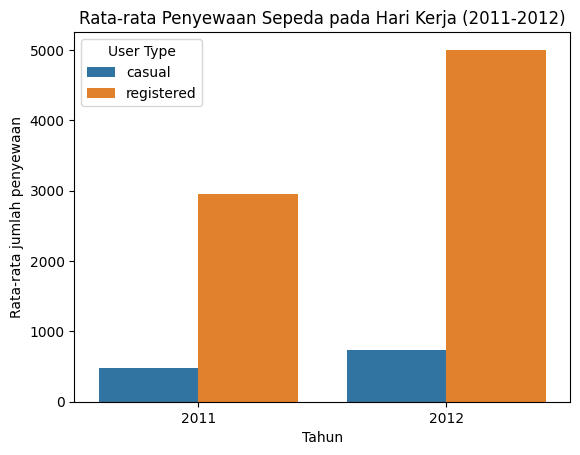

In [ ]:
sns.barplot(data=avg_rentals_melted, x="yr", y="Average Rentals", hue="User Type")
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja (2011-2012)")
plt.xlabel('Tahun')
plt.ylabel('Rata-rata jumlah penyewaan')
plt.show()

**Insight:**
- dari grafis pertama diketahui mengenai pola rata-rata penywaan sepeda per hari di tiap musim pada tahun 2011.
- dari grafis kedua diketahui tren jumlah penywaan sepda per bulan di musim panas tahun 2012
- dari grafis ketiga diketahui mengenai rata-rata penyewa kasual dan terdaftar di tahun 2011 dan 2012

## Analisis Lanjutan (Opsional)

Di sini saya ingin melakukan analisis lanjutan dengan menggunakan teknik binning untuk menjawab pertanyaan "Bagaimana pengaruh kategori suhu terhadap jumlah penyewaan sepeda di musim gugur tahun 2011?"


Menfilter data pada musim gugur tahun 2011

In [ ]:
df_fall_2011 = day_df[(day_df['yr'] == 0) & (day_df['season'] == 3)]

Membagi kolom temp menjadi beberapa ketegori suhu

In [ ]:
bins = [0, 20/41, 30/41, 0.9]
labels = ['Dingin', 'Normal', 'Panas']

df_fall_2011['suhu_kategori'] = pd.cut(day_df['temp'], bins=bins, labels=labels, right=False)

<ipython-input-17-fa9ba3697c9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall_2011['suhu_kategori'] = pd.cut(day_df['temp'], bins=bins, labels=labels, right=False)


Mengelompokkan data jumlah penyewa berdasarkan kategori suhu tadi dan menvisualisasikannya

<ipython-input-18-c311cff662a4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = df_fall_2011.groupby(['suhu_kategori'])['cnt'].sum().reset_index()
<ipython-input-18-c311cff662a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_analysis, y='suhu_kategori', x='cnt', palette='viridis')


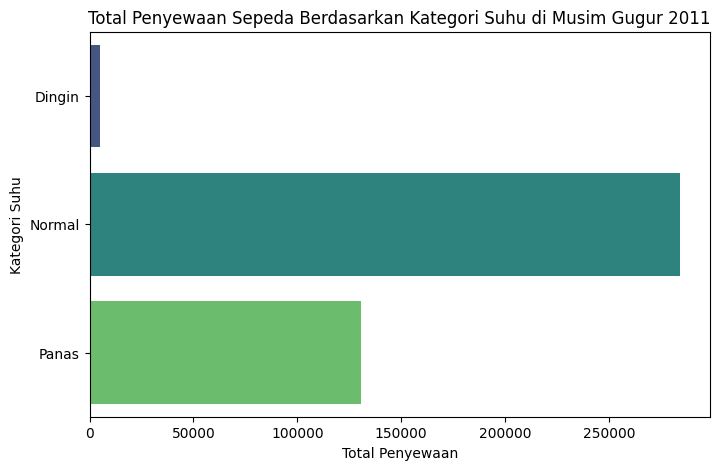

In [ ]:
temp_analysis = df_fall_2011.groupby(['suhu_kategori'])['cnt'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=temp_analysis, y='suhu_kategori', x='cnt', palette='viridis')
plt.title('Total Penyewaan Sepeda Berdasarkan Kategori Suhu di Musim Gugur 2011')
plt.ylabel('Kategori Suhu')
plt.xlabel('Total Penyewaan')
plt.show()

**Insight:**
- total penyewa pada suhu normal adalah yang paling tertinggi dan paling rendag adalah pada suhu yang dingin.

## Conclusion

- Kesimpulan pertanyaan 1: penggunaan sepeda meningkat selama akhir pekan di musim panas dan musim gugur, sedangkan di musim semi dan musim dingin, penggunaan sepeda lebih tinggi pada hari kerja. Pada musim gugur, penggunaan sepeda menunjukkan rata-rata tertinggi dan sebaliknya pada musim semi penggunaan sepeda mengalamai penurunan sangat jauh dibanding musil lainnya.
- Kesimpulan pertanyaan 2: Penggunaan sepeda mulai meningkat secara bertahap dari bulan Maret dengan penyewa sebanyak 64.016  hingga mencapai lonjakan besar di bulan April dengan penyewa 174.224. Hal ini menunjukkan adanya peningkatan aktivitas bersepeda seiring dengan datangnya cuaca yang lebih hangat. Selanjutnya pada bulan juni mengalami penurunan hingga penyewa sebanyak 137.168.
- Kesimpulan pertanyaan 3: Dari data yang diketahui, terdapat pertumbuhan positif baik penyewa kasual maupun terdaftar dari tahun 2011 ke 2012. Penyewa terdaftar menunjukkan pertumbuhan yang jauh lebih besar dibandingkan penyewa kasual, dengan rata-rata penyewaan meningkat dari 2.951,640 di tahun 2011 menjadi 5.004,860 di tahun 2012. Sedangkan untuk penyewa kasual meningkat dari 473.416 di tahun 2011 menjadi 739.724 di tahun 2012.
- Kesimpulan dari analisis lanjutan: suhu juga berpengaruh terhadap jumlah penyewa. ketika suhu sedang di luar kategori normal (digin maupun panas), maka jumlah penyewa mengalami penurunan.  